# Homework 4 - Week 4

### Question 9.1

***Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components. Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2. You can use the R function prcomp for PCA. (Note that to first scale the data, you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)***

In [2]:
library(dplyr)

In [76]:
crime_df <- read.table("uscrime.txt",header = TRUE)

In [77]:
head(crime_df)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [78]:
str(crime_df)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 

We call prcomp() to do PCA on the data.

The goal is to draw a graph that shows how the samples are related (or not related) to each other.

In [87]:
pca <- prcomp(crime_df[,1:15], center = TRUE,scale = TRUE)

In [88]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

In [89]:
pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
-4.1992835,-1.09383120,-1.11907395,0.67178115,0.055283376,0.30733835,-0.566408161,-0.007801727,0.223509947,0.452743650,-0.0847454174,0.22096639,-0.112616798,0.326964861,0.0233840087
1.1726630,0.67701360,-0.05244634,-0.08350709,-1.173199821,-0.58323731,0.195611187,0.154566472,0.436777195,0.212085890,-0.0339166059,0.35686524,0.297516509,0.252356741,-0.0607636781
-4.1737248,0.27677501,-0.37107658,0.37793995,0.541345246,0.71872230,0.103306929,0.351138883,0.062992321,-0.067190215,-0.4814915573,-0.04701948,0.052160542,-0.486551130,0.0421174952
3.8349617,-2.57690596,0.22793998,0.38262331,-1.644746496,0.72948841,0.266994985,-1.547460841,-0.379541806,0.229223052,0.1098495110,0.17727101,0.088381306,0.149678420,0.0291749700
1.8392999,1.33098564,1.27882805,0.71814305,0.041590320,-0.39409015,0.070507664,-0.543237437,0.224632448,0.477690842,-0.3295818584,0.41807551,-0.722152235,0.131027187,-0.0751493967
2.9072336,-0.33054213,0.53288181,1.22140635,1.374360960,-0.69225131,0.226482092,0.562323186,0.417722172,0.091009390,0.0102296864,-0.70661980,-0.135172709,0.194925675,0.0155861048
0.2457752,-0.07362562,-0.90742064,1.13685873,0.718644387,-0.93107472,0.307507661,1.056861503,-1.160218292,0.791683164,0.2829470570,-0.65196573,0.168327740,0.145473719,-0.0654492790
-0.1301330,-1.35985577,0.59753132,1.44045387,-0.222781388,0.04912052,0.911404993,0.693339330,-0.421314146,0.613278523,-0.3211719754,0.49089082,0.218057687,-0.623230400,-0.0259344691
-3.6103169,-0.68621008,1.28372246,0.55171150,-0.324292990,0.12683417,-0.417420968,-0.053270500,0.232662026,0.065541569,0.1212937342,-0.29249322,-0.242429444,0.026476592,0.0252300906
1.1672376,3.03207033,0.37984502,-0.28887026,-0.646056610,0.33130781,0.009579488,-0.329270845,-0.123629746,0.200126861,-0.0005664179,-0.21063943,-0.257769674,-0.276967642,0.0232404560


In [90]:
print(pca$rotation)

               PC1         PC2           PC3         PC4         PC5
M      -0.30371194  0.06280357  0.1724199946 -0.02035537 -0.35832737
So     -0.33088129 -0.15837219  0.0155433104  0.29247181 -0.12061130
Ed      0.33962148  0.21461152  0.0677396249  0.07974375 -0.02442839
Po1     0.30863412 -0.26981761  0.0506458161  0.33325059 -0.23527680
Po2     0.31099285 -0.26396300  0.0530651173  0.35192809 -0.20473383
LF      0.17617757  0.31943042  0.2715301768 -0.14326529 -0.39407588
M.F     0.11638221  0.39434428 -0.2031621598  0.01048029 -0.57877443
Pop     0.11307836 -0.46723456  0.0770210971 -0.03210513 -0.08317034
NW     -0.29358647 -0.22801119  0.0788156621  0.23925971 -0.36079387
U1      0.04050137  0.00807439 -0.6590290980 -0.18279096 -0.13136873
U2      0.01812228 -0.27971336 -0.5785006293 -0.06889312 -0.13499487
Wealth  0.37970331 -0.07718862  0.0100647664  0.11781752  0.01167683
Ineq   -0.36579778 -0.02752240 -0.0002944563 -0.08066612 -0.21672823
Prob   -0.25888661  0.15831708 -0.

### rotation matrix is a formula that converts from the original variables to Principal Components


**So PC1 is nothing but (-0.30371194 * M) + (-0.33088129 * SO) + (0.33962148 * Ed) + ............ + (-0.02062867 * Time), similarly it goes for other PC's**

In [49]:
# We use **sdev** to calculate the variation in the original data each PC accounts for

pca.var <- pca$sdev^2

In [50]:
pca.var

[1] 6.018952657 2.801847026 2.004944334 1.162207801 0.958298972 0.553193900
 [7] 0.321818687 0.307401270 0.235155292 0.199880931 0.175685403 0.128190107
[13] 0.069341691 0.058467765 0.004614165

In [51]:
pca.var.per <- round(pca.var/sum(pca.var)*100, 1) # PERCENTAGE of variation

In [52]:
pca.var.per

[1] 40.1 18.7 13.4  7.7  6.4  3.7  2.1  2.0  1.6  1.3  1.2  0.9  0.5  0.4  0.0

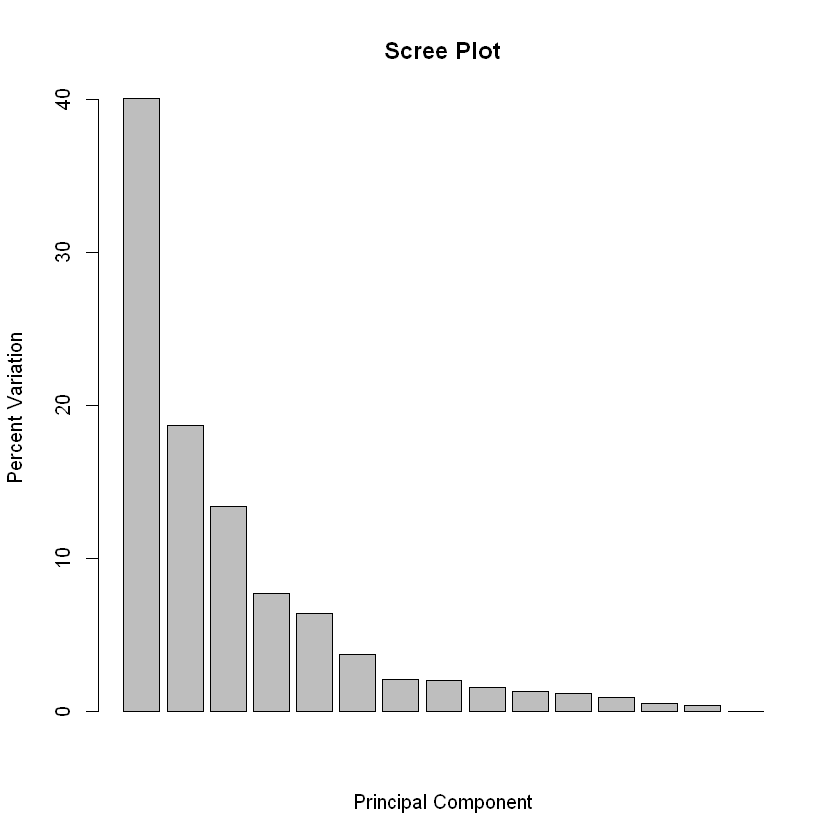

In [53]:
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

In [69]:
prop_varex <- pca.var.per/sum(pca.var.per)

prop_varex

[1] 0.401 0.187 0.134 0.077 0.064 0.037 0.021 0.020 0.016 0.013 0.012 0.009
[13] 0.005 0.004 0.000

**We can see that the first principal component explains 40.1% variance. Second component explains 18.7% variance. Third component explains 13.4% variance and so on.**

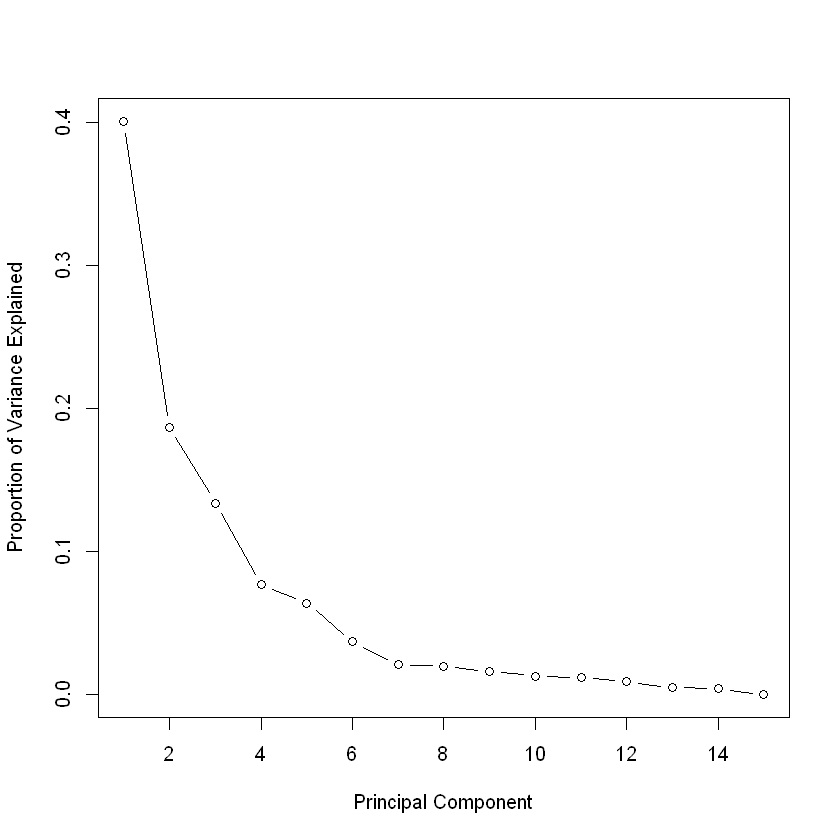

In [68]:
plot(prop_varex, xlab = "Principal Component",
 ylab = "Proportion of Variance Explained",
 type = "b")

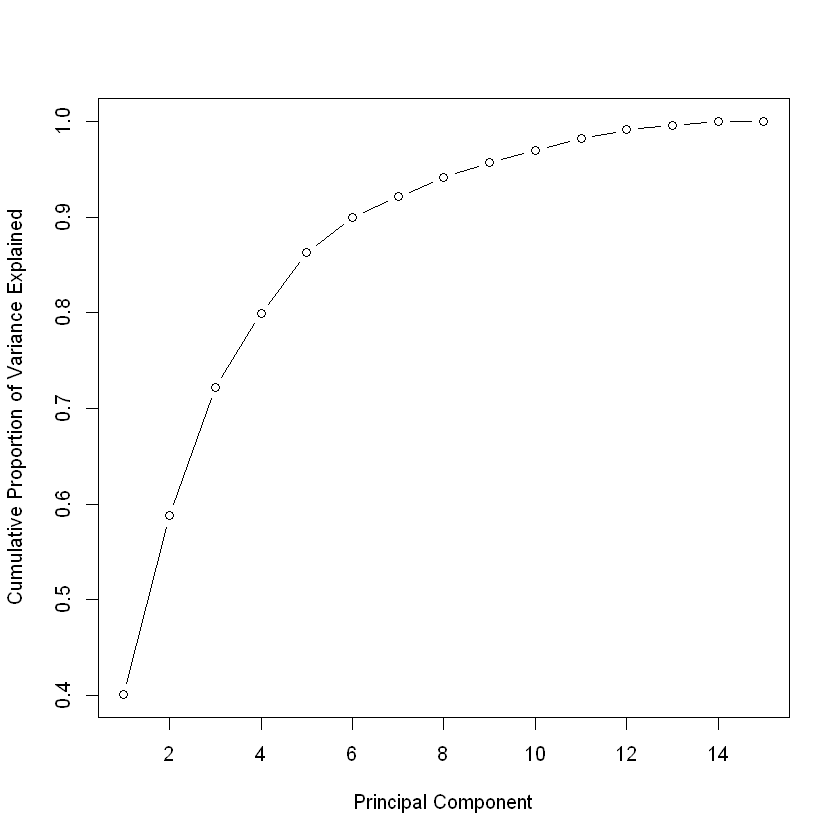

In [67]:
#cumulative scree plot
plot(cumsum(prop_varex), xlab = "Principal Component",
 ylab = "Cumulative Proportion of Variance Explained",
 type = "b")

### From the above 2 plots; I'm taking the first 7 Principal Component, because they account for a little more than 90% of the variation in data

In [124]:
 # First 6 Principal Components
prc <- pca$x[,1:7]
head(prc)

PC1,PC2,PC3,PC4,PC5,PC6,PC7
-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338,0.3073383,-0.56640816
1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982,-0.5832373,0.19561119
-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525,0.7187223,0.10330693
3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650,0.7294884,0.26699499
1.839300,1.3309856,1.27882805,0.71814305,0.04159032,-0.3940902,0.07050766
2.907234,-0.3305421,0.53288181,1.22140635,1.37436096,-0.6922513,0.22648209


**Next, I am going to create a dataframe of the 6 Principal Components and append the Crime response column to perform Linear Regression using lm() function**

In [125]:
new_df <- as.data.frame(cbind(crime_df[,16],prc))
colnames(new_df) <- c("Crime", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7")
new_df

Crime,PC1,PC2,PC3,PC4,PC5,PC6,PC7
791,-4.1992835,-1.09383120,-1.11907395,0.67178115,0.055283376,0.30733835,-0.566408161
1635,1.1726630,0.67701360,-0.05244634,-0.08350709,-1.173199821,-0.58323731,0.195611187
578,-4.1737248,0.27677501,-0.37107658,0.37793995,0.541345246,0.71872230,0.103306929
1969,3.8349617,-2.57690596,0.22793998,0.38262331,-1.644746496,0.72948841,0.266994985
1234,1.8392999,1.33098564,1.27882805,0.71814305,0.041590320,-0.39409015,0.070507664
682,2.9072336,-0.33054213,0.53288181,1.22140635,1.374360960,-0.69225131,0.226482092
963,0.2457752,-0.07362562,-0.90742064,1.13685873,0.718644387,-0.93107472,0.307507661
1555,-0.1301330,-1.35985577,0.59753132,1.44045387,-0.222781388,0.04912052,0.911404993
856,-3.6103169,-0.68621008,1.28372246,0.55171150,-0.324292990,0.12683417,-0.417420968
705,1.1672376,3.03207033,0.37984502,-0.28887026,-0.646056610,0.33130781,0.009579488


In [126]:
cor(new_df)[,1]

Crime         PC1         PC2         PC3         PC4         PC5 
 1.00000000  0.41368481 -0.30331302  0.09223697  0.19357298 -0.57972578 
        PC6         PC7 
-0.11579410  0.17198705

In [130]:
a.lm <- lm(Crime~., data = new_df)

In [131]:
summary(a.lm)


Call:
lm(formula = Crime ~ ., data = new_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-475.41 -141.65   34.73  137.25  412.32 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      34.21  26.454  < 2e-16 ***
PC1            65.22      14.10   4.626 4.04e-05 ***
PC2           -70.08      20.66  -3.392   0.0016 ** 
PC3            25.19      24.42   1.032   0.3086    
PC4            69.45      32.08   2.165   0.0366 *  
PC5          -229.04      35.33  -6.483 1.11e-07 ***
PC6           -60.21      46.50  -1.295   0.2029    
PC7           117.26      60.96   1.923   0.0617 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 234.6 on 39 degrees of freedom
Multiple R-squared:  0.6882,	Adjusted R-squared:  0.6322 
F-statistic:  12.3 on 7 and 39 DF,  p-value: 3.513e-08


**Bringing back the model output to orginal variables**

In [166]:
betas1 <- as.matrix(sapply(data.frame(pca$rotation[,1:7]), as.numeric)) %*% as.matrix(sapply(data.frame(t(a.lm$coefficients[-1])), as.numeric))

In [203]:
pca$rotation[,1:7] %*% a.lm$coefficients[2:8]

M,69.420279
So,66.940187
Ed,-7.611451
Po1,132.506149
Po2,129.808521
LF,27.212545
M.F,130.843740
Pop,36.544822
NW,58.457563
U1,-18.528807
U2,20.620319


In [190]:
b <- t(data.frame(betas1))
colnames(b) <- c("M","So","Ed","Po1","Po2","LF","M.F","Pop","NW","U1","U2","Wealth","Ineq","Prob","Time")
b

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
betas1,69.42028,66.94019,-7.611451,132.5061,129.8085,27.21254,130.8437,36.54482,58.45756,-18.52881,20.62032,27.82379,49.67512,-117.5631,-15.69815


**Compare its quality to that of your solution to Question 8.2: My R^2 and Adjusted R^2 for solution 8.2 were 0.8031 and 0.7078, the model was overfitted and affected by multicollinearity, we can see that with the difference btw R^2 and Adj R^2 values.**


**But in the current model that we have got the output from PCA, although the model has given less R^2 or adj R^2 compared to the solution of Question 8.2, I think in this model we have considered the variables that accounted for the major variation and removed the other variables. So, even though the R^2 and Adj R^2 is less this model is free from overfitting and multicollinearity**

In [194]:
head(crime_df)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [198]:
t(t(pca$x %*% t(pca$rotation))* pca$scale)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
1.24255319,0.6595745,-1.46382979,-2.7,-2.42340426,-0.051191489,-3.30212766,-3.6170213,19.98723404,0.0125319149,0.70212766,-1313.829787,6.700000e+00,3.751062e-02,-0.3968213
0.44255319,-0.3404255,0.73617021,1.8,1.47659574,0.021808511,2.89787234,-23.6170213,0.08723404,0.0005319149,0.20212766,316.170213,1.254406e-16,-1.749238e-02,-1.2980213
0.34255319,0.6595745,-1.66382979,-4.0,-3.62340426,-0.028191489,-1.40212766,-18.6170213,11.78723404,-0.0014680851,-0.09787234,-2073.829787,5.600000e+00,3.630962e-02,-2.2973213
-0.25744681,-0.3404255,1.53617021,6.4,6.07659574,0.015808511,1.09787234,120.3829787,-2.11276596,0.0065319149,0.50212766,1476.170213,-2.700000e+00,-3.129038e-02,3.3032787
0.24255319,-0.3404255,1.53617021,2.4,2.07659574,0.029808511,0.19787234,-18.6170213,-7.11276596,-0.0044680851,-1.39787234,526.170213,-2.000000e+00,-5.692383e-03,-5.2981213
-1.75744681,-0.3404255,0.43617021,3.3,3.47659574,-0.014191489,-1.90212766,-11.6170213,-5.71276596,-0.0114680851,-0.49787234,1636.170213,-6.800000e+00,-1.289038e-02,-5.5984213
-1.15744681,0.6595745,0.53617021,-0.3,-0.12340426,-0.042191489,-0.10212766,-32.6170213,3.78723404,0.0015319149,0.40212766,946.170213,-2.600000e+00,-4.991383e-03,-5.8986213
-0.75744681,0.6595745,0.33617021,3.0,2.87659574,-0.019191489,-1.40212766,13.3829787,7.78723404,-0.0164680851,0.10212766,-533.829787,1.200000e+00,-6.992383e-03,-1.9991213
1.84255319,0.6595745,-1.56382979,-2.0,-1.82340426,-0.008191489,-2.80212766,2.3829787,18.48723404,-0.0144680851,-0.59787234,-1043.829787,4.500000e+00,2.460562e-02,2.8021787
0.14255319,-0.3404255,1.23617021,-1.4,-1.22340426,0.070808511,4.59787234,-29.6170213,-8.61276596,0.0045319149,-0.99787234,6.170213,-2.000000e+00,-2.593383e-03,-6.9985213
